In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv(
    r"C:\Users\BLUEZONE\Desktop\EMIPredict AI\emi_prediction_dataset.csv",
    low_memory=False
)

In [14]:
print("\nData Types:\n", df.dtypes)


Data Types:
 age                        object
gender                     object
marital_status             object
education                  object
monthly_salary             object
employment_type            object
years_of_employment       float64
company_type               object
house_type                 object
monthly_rent              float64
family_size                 int64
dependents                  int64
school_fees               float64
college_fees              float64
travel_expenses           float64
groceries_utilities       float64
other_monthly_expenses    float64
existing_loans             object
current_emi_amount        float64
credit_score              float64
bank_balance               object
emergency_fund            float64
emi_scenario               object
requested_amount          float64
requested_tenure            int64
emi_eligibility            object
max_monthly_emi           float64
dtype: object


In [15]:
print("\nPreview of dataset:\n", df.head())


Preview of dataset:
   age  gender marital_status     education monthly_salary employment_type  \
0  38  Female        Married  Professional        82600.0         Private   
1  38  Female        Married      Graduate        21500.0         Private   
2  38    Male        Married  Professional        86100.0         Private   
3  58  Female        Married   High School        66800.0         Private   
4  48  Female        Married  Professional        57300.0         Private   

   years_of_employment company_type house_type  monthly_rent  ...  \
0                  0.9     Mid-size     Rented       20000.0  ...   
1                  7.0          MNC     Family           0.0  ...   
2                  5.8      Startup        Own           0.0  ...   
3                  2.2     Mid-size        Own           0.0  ...   
4                  3.4     Mid-size     Family           0.0  ...   

   existing_loans  current_emi_amount  credit_score  bank_balance  \
0             Yes             2

In [16]:
print("\nMissing values in each column:\n", df.isna().sum())


Missing values in each column:
 age                          0
gender                       0
marital_status               0
education                 2404
monthly_salary               0
employment_type              0
years_of_employment          0
company_type                 0
house_type                   0
monthly_rent              2426
family_size                  0
dependents                   0
school_fees                  0
college_fees                 0
travel_expenses              0
groceries_utilities          0
other_monthly_expenses       0
existing_loans               0
current_emi_amount           0
credit_score              2420
bank_balance              2426
emergency_fund            2351
emi_scenario                 0
requested_amount             0
requested_tenure             0
emi_eligibility              0
max_monthly_emi              0
dtype: int64


In [17]:
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [18]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip()

In [19]:
for col in df.columns:
    vals = df[col].dropna().astype(str).str.lower().unique().tolist()
    if set(vals).issubset({'yes', 'no'}):
        df[col] = df[col].str.lower().map({'yes': 1, 'no': 0})

In [20]:
if 'gender' in df.columns:
    df['gender'] = df['gender'].astype(str).str.lower().replace({'m': 'male', 'f': 'female'})

In [21]:
num_cols = [
    'age','monthly_salary','years_of_employment','monthly_rent','school_fees','college_fees',
    'travel_expenses','groceries_utilities','other_monthly_expenses','existing_loans',
    'current_emi_amount','credit_score','bank_balance','emergency_fund',
    'requested_amount','requested_tenure'
]
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [22]:
for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna('Unknown')

In [23]:
df.to_csv(r"C:\Users\BLUEZONE\Desktop\EMIPredict AI\emi_prediction_dataset_cleaned.csv", index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.



emi_eligibility value counts:
 emi_eligibility
Not_Eligible    312868
Eligible         74444
High_Risk        17488
Name: count, dtype: int64


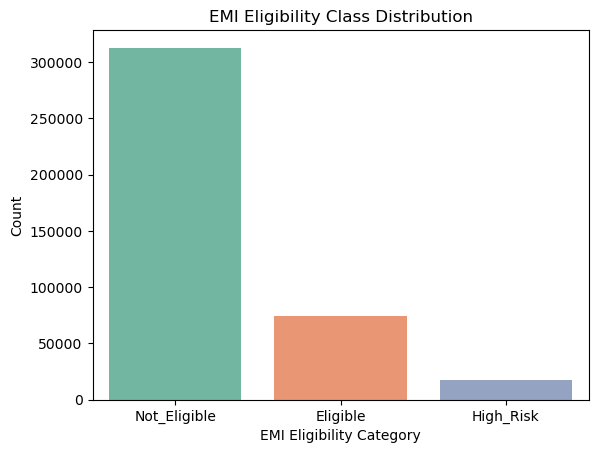

In [24]:
if 'emi_eligibility' in df.columns:
    print("\nemi_eligibility value counts:\n", df['emi_eligibility'].value_counts())
    sns.countplot(x='emi_eligibility', data=df, hue='emi_eligibility', palette='Set2', legend=False)
    plt.title("EMI Eligibility Class Distribution")
    plt.xlabel("EMI Eligibility Category")
    plt.ylabel("Count")
    plt.show()

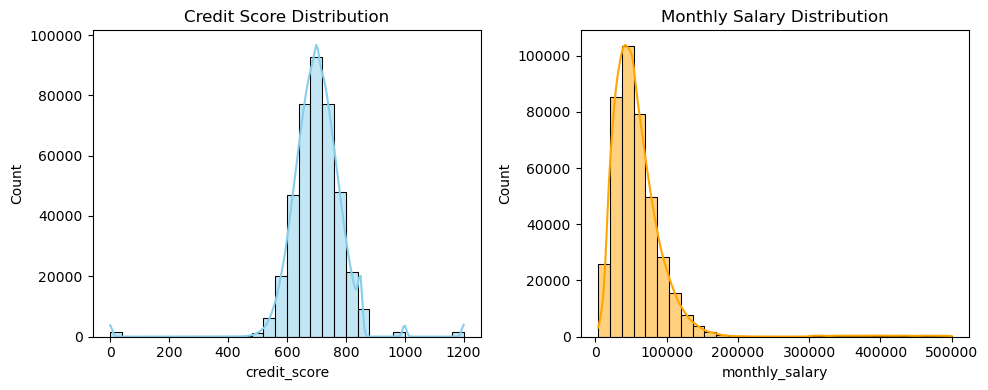

In [25]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['credit_score'], bins=30, kde=True, color='skyblue')
plt.title('Credit Score Distribution')

plt.subplot(1,2,2)
sns.histplot(df['monthly_salary'], bins=30, kde=True, color='orange')
plt.title('Monthly Salary Distribution')
plt.tight_layout()
plt.show()

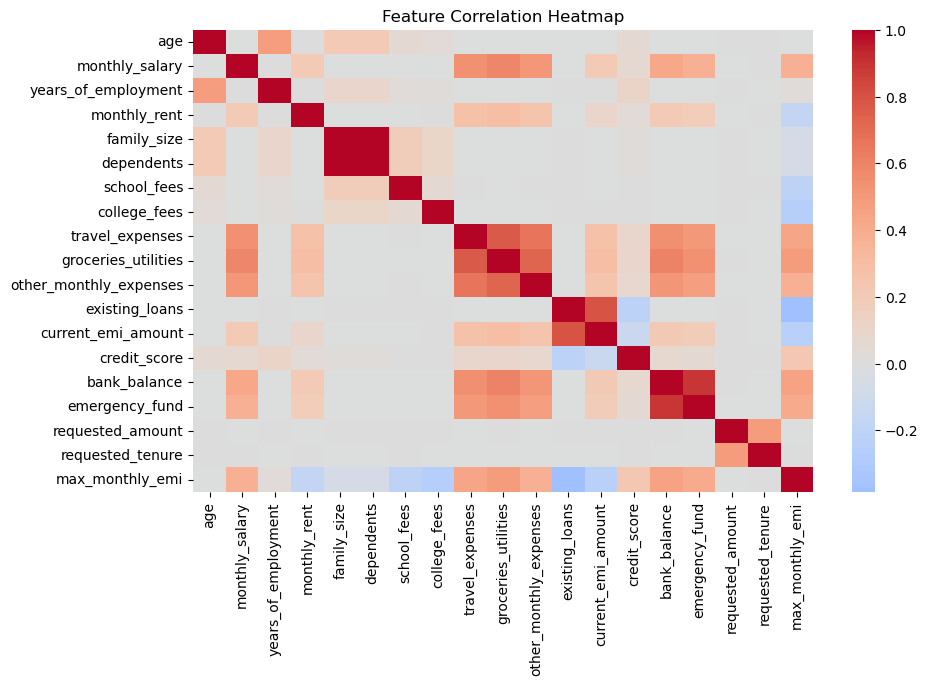

In [26]:
numeric_df = df.select_dtypes('number')
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

In [27]:
#Visual Analysis

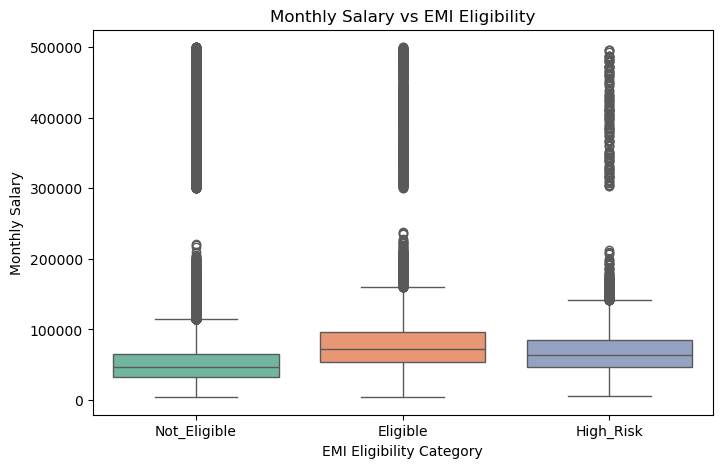

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot(x='emi_eligibility', y='monthly_salary', data=df, hue='emi_eligibility', palette='Set2', legend=False)
plt.title("Monthly Salary vs EMI Eligibility")
plt.xlabel("EMI Eligibility Category")
plt.ylabel("Monthly Salary")
plt.show()

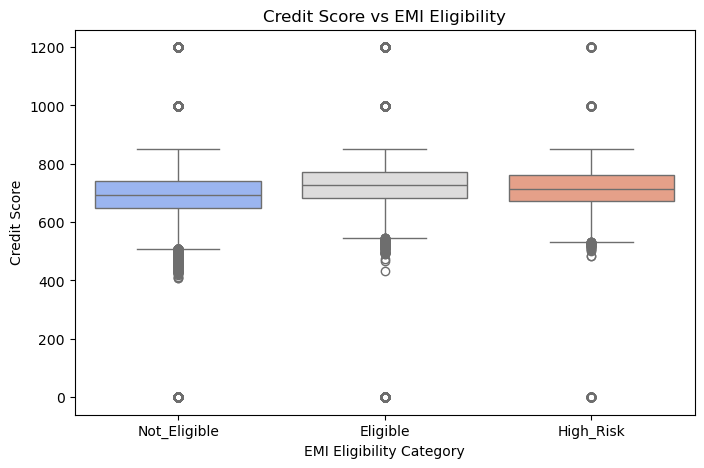

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='emi_eligibility',
    y='credit_score',
    data=df,
    hue='emi_eligibility',       
    palette='coolwarm',
    legend=False                 
)
plt.title("Credit Score vs EMI Eligibility")
plt.xlabel("EMI Eligibility Category")
plt.ylabel("Credit Score")
plt.show()

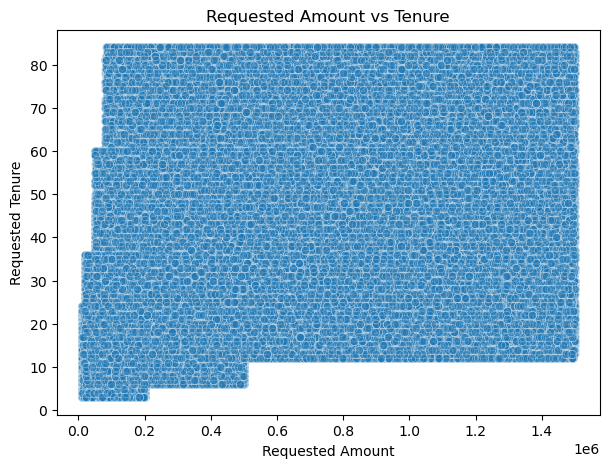

In [30]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='requested_amount', y='requested_tenure', data=df, alpha=0.4)
plt.title("Requested Amount vs Tenure")
plt.xlabel("Requested Amount")
plt.ylabel("Requested Tenure")
plt.show()

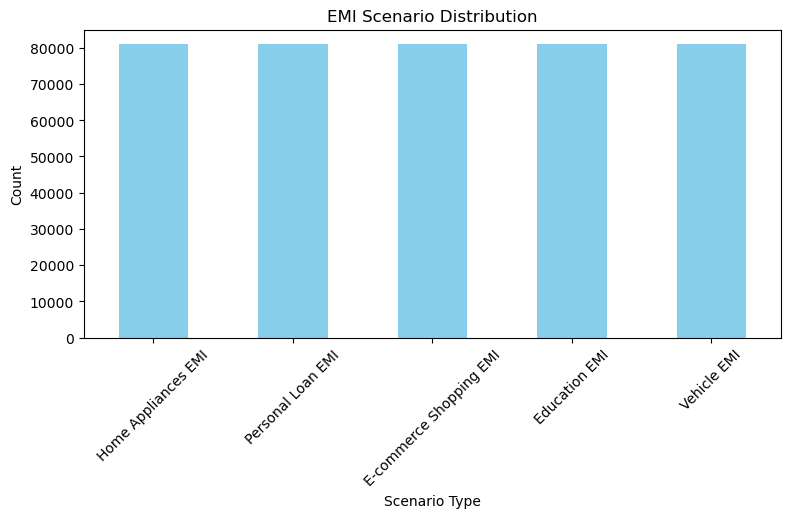

In [31]:
if 'emi_scenario' in df.columns:
    plt.figure(figsize=(9,4))
    df['emi_scenario'].value_counts().plot(kind='bar', color='skyblue')
    plt.title("EMI Scenario Distribution")
    plt.xlabel("Scenario Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

#Feature Engineering

In [32]:
df['debt_to_income'] = (
    (df['current_emi_amount'] + df['existing_loans']) /
    (df['monthly_salary'] + 1e-6)
)
expense_cols = [
    'groceries_utilities', 'travel_expenses', 'other_monthly_expenses',
    'school_fees', 'college_fees', 'monthly_rent'
]
df['expense_to_income'] = (
    df[expense_cols].sum(axis=1) /
    (df['monthly_salary'] + 1e-6)
)
df['affordability_ratio'] = df['bank_balance'] / (df['monthly_salary'] + 1e-6)

df.to_csv(r"C:\Users\BLUEZONE\Desktop\EMIPredict AI\emi_prediction_dataset_features.csv", index=False)
print("Feature-engineered dataset saved successfully.")

Feature-engineered dataset saved successfully.


#Feature Selection & Data Splitting

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df.columns = df.columns.str.strip().str.lower()

le = LabelEncoder()
df['emi_eligibility_encoded'] = le.fit_transform(df['emi_eligibility'])

print(dict(zip(le.classes_, le.transform(le.classes_))))

corr = df.corr(numeric_only=True)['emi_eligibility_encoded'].sort_values(ascending=False)
print("\nTop correlated features with EMI eligibility:\n")
print(corr.head(15))

features = [
    'age','monthly_salary','credit_score','bank_balance','requested_amount',
    'requested_tenure','debt_to_income','expense_to_income','affordability_ratio'
]

X = df[features]
y = df['emi_eligibility_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n Data split successful!")
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

{'Eligible': np.int64(0), 'High_Risk': np.int64(1), 'Not_Eligible': np.int64(2)}

Top correlated features with EMI eligibility:

emi_eligibility_encoded    1.000000
requested_amount           0.311561
existing_loans             0.252402
debt_to_income             0.190002
expense_to_income          0.173782
college_fees               0.170083
current_emi_amount         0.154549
school_fees                0.141106
monthly_rent               0.103674
dependents                 0.039865
family_size                0.039865
age                        0.001610
requested_tenure          -0.017025
years_of_employment       -0.018175
affordability_ratio       -0.035634
Name: emi_eligibility_encoded, dtype: float64

 Data split successful!
Training shape: (323840, 9)
Testing shape: (80960, 9)


#Random Forest Classifier + Feature Importance

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['emi_eligibility_encoded'] = le.fit_transform(df['emi_eligibility'])

features = [
    'max_monthly_emi', 'groceries_utilities', 'bank_balance',
    'travel_expenses', 'emergency_fund', 'monthly_salary',
    'credit_score', 'affordability_ratio', 'expense_to_income',
    'current_emi_amount'
]

X = df[features]
y = df['emi_eligibility_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("\n Random Forest trained successfully!")
print(f" Accuracy: {round(accuracy_score(y_test, y_pred) * 100, 2)}%")

print("\n Classification Report:\n",
      classification_report(y_test, y_pred, target_names=le.classes_))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Random Forest trained successfully!
 Accuracy: 81.96%

 Classification Report:
               precision    recall  f1-score   support

    Eligible       0.61      0.50      0.55     14889
   High_Risk       1.00      0.00      0.01      3497
Not_Eligible       0.86      0.94      0.90     62574

    accuracy                           0.82     80960
   macro avg       0.82      0.48      0.48     80960
weighted avg       0.82      0.82      0.79     80960


 Confusion Matrix:
 [[ 7480     0  7409]
 [ 1096    12  2389]
 [ 3711     0 58863]]


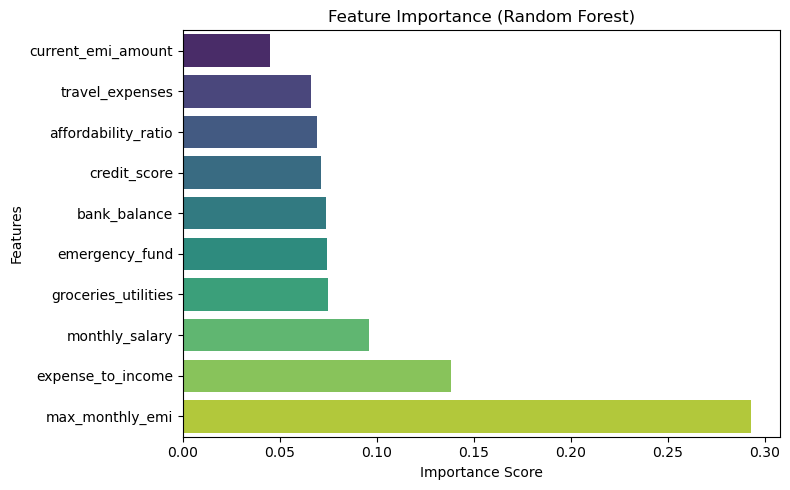

In [35]:
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(
    x=importances,
    y=importances.index,
    hue=importances.index,       
    palette="viridis",
    legend=False                 
)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

#Model Training

In [36]:
numeric_cols = [
    'bank_balance', 'emergency_fund', 'requested_amount', 
    'monthly_salary', 'groceries_utilities', 'travel_expenses',
    'other_monthly_expenses', 'current_emi_amount'
]

for col in numeric_cols:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(',', '')        
            .str.replace('..', '.')      
            .str.extract(r'(\d+\.?\d*)')[0]  
            .astype(float)
        )

print(" All numeric columns cleaned successfully!")

 All numeric columns cleaned successfully!


#Create Ratio Features

In [37]:
import numpy as np

df['affordability_ratio'] = (
    (df['bank_balance'] + df['emergency_fund']) / (df['requested_amount'] + 1)
)

df['expense_to_income'] = (
    (df['groceries_utilities'] + df['travel_expenses'] + df['other_monthly_expenses'])
    / (df['monthly_salary'] + 1)
)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

print(" Engineered features created successfully!")
print(df[['affordability_ratio', 'expense_to_income']].head())

 Engineered features created successfully!
   affordability_ratio  expense_to_income
0             0.439294           0.483045
1             0.932805           0.479047
2             3.255872           0.413468
3             2.036178           0.389216
4             0.498014           0.486902


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

le = LabelEncoder()
df['emi_eligibility_encoded'] = le.fit_transform(df['emi_eligibility'])

features = [
    'max_monthly_emi','groceries_utilities','bank_balance',
    'travel_expenses','emergency_fund','monthly_salary',
    'credit_score','affordability_ratio','expense_to_income',
    'current_emi_amount'
]

X = df[features]
y = df['emi_eligibility_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=3000))
])
lr_pipeline.fit(X_train, y_train)
lr_pred = lr_pipeline.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print(" Both models trained successfully!")
print(f"\nLogistic Regression Accuracy: {round(lr_acc*100, 2)}%")
print(f"Random Forest Accuracy:       {round(rf_acc*100, 2)}%")

 Both models trained successfully!

Logistic Regression Accuracy: 85.34%
Random Forest Accuracy:       89.26%


In [39]:
import pickle
print("\n Model Comparison:")
print(f"Logistic Regression Accuracy: {round(lr_acc*100, 2)}%")
print(f"Random Forest Accuracy:       {round(rf_acc*100, 2)}%\n")

best_model = rf if rf_acc > lr_acc else lr_pipeline
best_name = "Random Forest" if rf_acc > lr_acc else "Logistic Regression"
print(f" Best Model Selected: {best_name}")

pickle.dump(best_model, open(r"C:\Users\BLUEZONE\Desktop\EMIPredict AI\best_model.pkl", "wb"))
pickle.dump(le, open(r"C:\Users\BLUEZONE\Desktop\EMIPredict AI\label_encoder.pkl", "wb"))

print("\n Model and Label Encoder Saved Successfully at:")
print("C:\\Users\\BLUEZONE\\Desktop\\EMIPredict AI\\best_model.pkl")


 Model Comparison:
Logistic Regression Accuracy: 85.34%
Random Forest Accuracy:       89.26%

 Best Model Selected: Random Forest

 Model and Label Encoder Saved Successfully at:
C:\Users\BLUEZONE\Desktop\EMIPredict AI\best_model.pkl


In [43]:
model = pickle.load(open(r"C:\Users\BLUEZONE\Desktop\EMIPredict AI\best_model.pkl", "rb"))
le = pickle.load(open(r"C:\Users\BLUEZONE\Desktop\EMIPredict AI\label_encoder.pkl", "rb"))

new_data = pd.DataFrame({
    'max_monthly_emi':[12000],
    'groceries_utilities':[8000],
    'bank_balance':[65000],
    'travel_expenses':[2000],
    'emergency_fund':[10000],
    'monthly_salary':[50000],
    'credit_score':[720],
    'affordability_ratio':[1.3],
    'expense_to_income':[0.4],
    'current_emi_amount':[3000]
})

prediction = model.predict(new_data)[0]
label = le.inverse_transform([prediction])[0]

print(f"\n Predicted EMI Eligibility → {label}")


 Predicted EMI Eligibility → Eligible


#MLFlow

In [44]:
import os
import mlflow

mlflow.set_tracking_uri("file:///C:/Users/BLUEZONE/EMI_MLFLOW")
os.environ["MLFLOW_REGISTRY_URI"] = "file:///C:/Users/BLUEZONE/EMI_MLFLOW"

print(" MLflow Tracking & Registry set to: C:/Users/BLUEZONE/EMI_MLFLOW")

 MLflow Tracking & Registry set to: C:/Users/BLUEZONE/EMI_MLFLOW


In [46]:
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient
import warnings
warnings.filterwarnings("ignore")

mlflow.set_experiment("EMI_Prediction_Models")

with mlflow.start_run(run_name="LogisticRegression") as lr_run:
    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_param("max_iter", 3000)
    mlflow.log_metric("accuracy", lr_acc)
    mlflow.sklearn.log_model(lr_pipeline, artifact_path="LogisticRegression_Model")
    lr_run_id = lr_run.info.run_id
    print(f" Logistic Regression logged! Run ID: {lr_run_id}")

with mlflow.start_run(run_name="RandomForest") as rf_run:
    mlflow.log_param("model", "RandomForestClassifier")
    mlflow.log_param("n_estimators", 200)
    mlflow.log_metric("accuracy", rf_acc)
    mlflow.sklearn.log_model(rf, artifact_path="RandomForest_Model")
    rf_run_id = rf_run.info.run_id
    print(f" Random Forest logged! Run ID: {rf_run_id}")

mlflow.end_run()

client = MlflowClient()
best_model_name = "RandomForest_Model" if rf_acc > lr_acc else "LogisticRegression_Model"
best_run_id = rf_run_id if rf_acc > lr_acc else lr_run_id

model_uri = f"runs:/{best_run_id}/{best_model_name}"
registered_model = mlflow.register_model(model_uri=model_uri, name="Best_EMI_Eligibility_Model")

print(f"\n Model Registered Successfully!")
print(f" Name: Best_EMI_Eligibility_Model | Version: {registered_model.version}")

2025/11/12 19:17:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/12 19:17:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/12 19:17:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


 Logistic Regression logged! Run ID: af3a3facd9f548078b44f6b61fa234f1


2025/11/12 19:17:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


 Random Forest logged! Run ID: f75c99f4ebe14219b19ca981daa7a6c8


Successfully registered model 'Best_EMI_Eligibility_Model'.
2025/11/12 19:17:53 WARNING mlflow.tracking._model_registry.fluent: Run with id f75c99f4ebe14219b19ca981daa7a6c8 has no artifacts at artifact path 'RandomForest_Model', registering model based on models:/m-d9380d55e5a845ad90f281c9e4bf29e1 instead



 Model Registered Successfully!
 Name: Best_EMI_Eligibility_Model | Version: 1


Created version '1' of model 'Best_EMI_Eligibility_Model'.
